In [53]:
#Download and extract the dataset from https://drive.google.com/uc?id=1U6RtBhML-Lj0w2suve0UhQmwcF5pfJCm&export=download

In [54]:
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [55]:
cat4 = cv2.imread('CATS_DOGS/train/CAT/4.jpg')

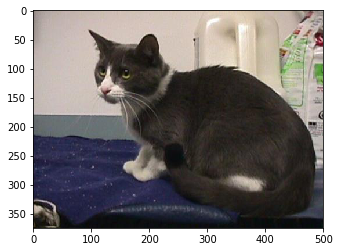

In [56]:
cat4 = cv2.cvtColor(cat4, cv2.COLOR_BGR2RGB)
plt.imshow(cat4)

In [57]:
cat4.shape

(375, 500, 3)

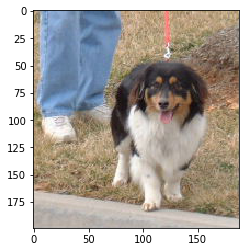

In [58]:
dog = cv2.imread('CATS_DOGS/train/DOG/2.jpg')
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)
plt.imshow(dog)

In [59]:
dog.shape

(199, 188, 3)

In [60]:
dog.max()

255

In [61]:
#We need to process the image before starting to train as they or different shapes

In [62]:
from keras.preprocessing.image import ImageDataGenerator

In [63]:
image_gen = ImageDataGenerator(rotation_range=30, #roate the images randomly by 30 degrees
                              width_shift_range=0.1, #Stretch out the images along X-axis randomly by 10%
                              height_shift_range = 0.1, #samething for height
                              rescale = 1/255, #bring the pixels to range 0 to 1 by dividing with 255
                              shear_range = 0.2, #Randomy crop 20% of the images
                              zoom_range = 0.2, #Randomly zoom by 20%
                              horizontal_flip = True, #flip the images by left or right
                              fill_mode = 'nearest'
                              )

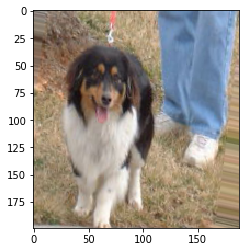

In [64]:
plt.imshow(image_gen.random_transform(dog))

In [65]:
#now we need to generate many manipulated images, directly from a directory

In [66]:
image_gen.flow_from_directory('CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [67]:
input_shape = (150,150,3)

In [68]:
#Now we are going to the recent version of Keras, so the syntax used in this code will be slightly different from that of previous ones

In [69]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Flatten,Conv2D,MaxPooling2D

In [70]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu')) #Note: The input shape used here is a rough approximation of the average
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu')) #Note: The input shape used here is a rough approximation of the average
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu')) #Note: The input shape used here is a rough approximation of the average
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu')) #essentially the same as providing it within the dense as well

model.add(Dropout(0.5)) #This layer helps reduce overfitting by randomly turning neurons off during training. Here we are going to randomly turn off
#50% of neurons

model.add(Dense(1)) #Because we have only one output.
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [71]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)             0         
__________

In [72]:
#Now it is time to train the model
#So, the way this works is we are gonna create image training generation objects for both training and testing. 
#For this we need to select a batch size

In [73]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('CATS_DOGS/train/',
                                               target_size=(150,150),
                                               batch_size= batch_size, #Import the images as 150 X 150
                                               class_mode= 'binary') #Number of classes here are 2

#This command is used to generate the image objects in a particular shape from the given directory, so that we can use it in the code


Found 18743 images belonging to 2 classes.


In [74]:
test_image_gen = image_gen.flow_from_directory('CATS_DOGS/test/',
                                               target_size=(150,150),
                                               batch_size= batch_size, #Import the images as 150 X 150
                                               class_mode= 'binary') #Number of classes here are 2

Found 6251 images belonging to 2 classes.


In [75]:
train_image_gen.class_indices #used to return the indices which it has used to define the classes loaded

{'CAT': 0, 'DOG': 1}

In [76]:
results = model.fit_generator(train_image_gen,epochs=1,steps_per_epoch=150, #Train only on 150 images per epoch
                             validation_data = test_image_gen, validation_steps=12) 
#Remember we are also taking batch size into account here. So, that means we are grabbing batches of 16 a 150 times and labellling that as an epoch

Epoch 1/1
108/150 [====================>.........] - ETA: 34s - loss: 0.6954 - acc: 0.5370

C:\Users\DELL\Anaconda3\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\DELL\Anaconda3\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\DELL\Anaconda3\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\DELL\Anaconda3\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\DELL\Anaconda3\

149/150 [============================>.] - ETA: 0s - loss: 0.6928 - acc: 0.5399

C:\Users\DELL\Anaconda3\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 18350080 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\DELL\Anaconda3\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:764: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 6. 
  warnings.warn(str(msg))


150/150 [==============================] - 215s 1s/step - loss: 0.6927 - acc: 0.5409 - val_loss: 0.6804 - val_acc: 0.5733


In [77]:
results.history['acc']

[0.5407779172642467]

In [78]:
#As it takes a lot of time to train a model for this data set. We are going to load a model that is trained for this data set with 100 epochs

In [79]:
from keras.models import load_model

In [80]:
new_model = load_model('cat_dog_100epochs.h5') #Load up an existing model that has been trained on this data set

In [81]:
dog_file = 'CATS_DOGS/test/DOG/10005.jpg'  #This image will be used to test the model

In [82]:
from keras.preprocessing import image

In [83]:
dog_img = image.load_img(dog_file,target_size=(150,150)) #Load the images as a 150 x 150 image

In [84]:
dog_img = image.img_to_array(dog_img) #convert the dog object to an array

In [85]:
dog_img.shape

(150, 150, 3)

In [86]:
#We need to change the dimension so that the neural network network thinks it is a batch of 1 image.
#So we need to dimensions to be (1,150,150,3)

In [87]:
import numpy as np
dog_img = np.expand_dims(dog_img,axis=0) #Expand it along the 0th index axis
dog_img.shape

(1, 150, 150, 3)

In [88]:
dog_img = dog_img / 255

In [95]:
model.predict_classes(dog_img)

array([[1]])

In [102]:
x = model.predict_classes(dog_img)
x = x.ravel()
if x == 1:
    print("It is an image of a dog")
else:
    print("It is an image of a cat")

It is a dog


In [96]:
model.predict(dog_img) #used to display the confidence value

array([[0.51552874]], dtype=float32)